In [4]:
!pip install xlrd


     ---------------------------------------- 96.5/96.5 kB 5.8 MB/s eta 0:00:00


In [5]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\Pranay kumar\Downloads\fashion_data_2018_2022 (1).xls"  # Use the actual file path
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   product_id    product_name  gender category     pattern  color age_group  \
0        1001    Biker Jacket    Male    Shirt   Geometric  White     25-35   
1        1002  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24   
2        1003     Wool Jacket  Female    Dress   Geometric  Brown     18-24   
3        1004    Summer Dress    Male   Shorts       Plain  White     25-35   
4        1005    Casual Jeans    Male    Shirt       Plain  Beige     35-45   

   season   price   material  sales_count  reviews_count  average_rating  \
0  Spring   70.36  Synthetic           75             65             4.9   
1  Summer   91.59       Wool          296             25             3.5   
2     All  129.52       Wool           50             32             4.3   
3     All  116.01     Cotton          435             73             4.6   
4  Winter  125.48    Viscose           79             36             3.6   

   out_of_stock_times brand  discount last_stock_date  wish_list_cou

In [6]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df = df.dropna()  # or use df.fillna(value) for filling

# Convert columns to appropriate data types
df['year_of_sale'] = df['year_of_sale'].astype(int)
df['price'] = df['price'].astype(float)
df['sales_count'] = df['sales_count'].astype(int)
df['average_rating'] = df['average_rating'].astype(float)

# Display data types
print(df.dtypes)

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64
product_id                     int64
product_name                  object
gender                        object
category                      object
pattern                       object
color                         object
age_group                     object
season                        object
price                        float64
material                      object
sales_count                    int32
reviews_count                  int64
average_rating               float64
out_of_stock_times        

In [7]:
# Get descriptive statistics
print(df.describe(include='all'))

         product_id product_name  gender category pattern  color age_group  \
count    660.000000          660     660      660     660    660       660   
unique          NaN           10       2        8       6     12         3   
top             NaN  Beach Shirt  Female    Skirt   Plain  White     18-24   
freq            NaN           83     331       99     220    174       226   
first           NaN          NaN     NaN      NaN     NaN    NaN       NaN   
last            NaN          NaN     NaN      NaN     NaN    NaN       NaN   
mean    1330.500000          NaN     NaN      NaN     NaN    NaN       NaN   
std      190.669872          NaN     NaN      NaN     NaN    NaN       NaN   
min     1001.000000          NaN     NaN      NaN     NaN    NaN       NaN   
25%     1165.750000          NaN     NaN      NaN     NaN    NaN       NaN   
50%     1330.500000          NaN     NaN      NaN     NaN    NaN       NaN   
75%     1495.250000          NaN     NaN      NaN     NaN    NaN

C:\Users\Pranay kumar\AppData\Local\Temp\ipykernel_8276\647849962.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select the features and target
features = ['year_of_sale', 'price', 'average_rating', 'sales_count']
target = 'sales_count'

# Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 3])  # Using 'sales_count' as the target
    return np.array(X), np.array(y)

# Sequence length (number of previous time steps to use for predicting the next time step)
seq_length = 5

X, y = create_sequences(scaled_data, seq_length)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             11000     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31251 (122.07 KB)
Trainable params: 31251 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/50
17/17 [==============================] - 4s 53ms/step - loss: 0.1684 - val_loss: 0.1051
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0999 - val_loss: 0.0801
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0968 - val_loss: 0.0811
Epoch 4/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0947 - val_loss: 0.0786
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0954 - val_loss: 0.0797
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0941 - val_loss: 0.0787
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0939 - val_loss: 0.0784
Epoch 8/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0905 - val_loss: 0.0793
Epoch 9/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0920 - val_loss: 0.0785
Epoch 10/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0924 - val_loss: 0.0785
Epoch 11/50
17/17 

Train Loss: 0.0875161737203598
Test Loss: 0.07839571684598923


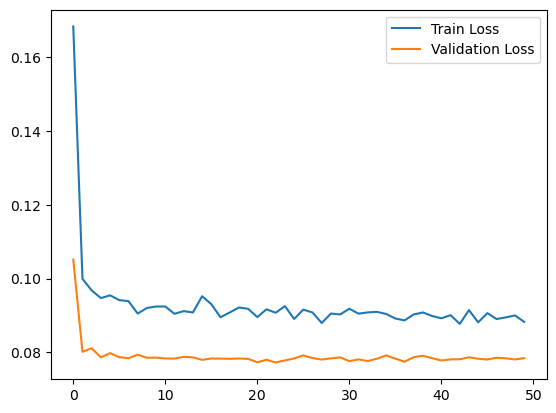

In [15]:
import matplotlib.pyplot as plt

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [16]:
# Function to forecast future demand for each product
def forecast_future_for_product(model, data, seq_length):
    input_seq = data[-seq_length:]
    input_seq = input_seq.reshape((1, seq_length, input_seq.shape[1]))
    pred = model.predict(input_seq)
    return pred[0][0]

# Initialize an empty list to store predictions
predictions = []

# Loop through each product
unique_products = df['product_name'].unique()

for product in unique_products:
    product_data = df[df['product_name'] == product]
    
    # Normalize the product data
    product_scaled_data = scaler.fit_transform(product_data[features])
    
    # Forecast future demand for the product
    predicted_sales = forecast_future_for_product(model, product_scaled_data, seq_length)
    
    # Append the result to the predictions list
    predictions.append({
        'product_name': product,
        'Year': 2023,
        'Predicted_sales_count': predicted_sales
    })

# Convert the predictions list to a DataFrame
output_df = pd.DataFrame(predictions)

# Print the output DataFrame
print(output_df)

1/1 [==============================] - 0s 24ms/step
     product_name  Year  Predicted_sales_count
0    Biker Jacket  2023               0.497879
1  Business Shirt  2023               0.432186
2     Wool Jacket  2023               0.471230
3    Summer Dress  2023               0.560523
4    Casual Jeans  2023               0.443275
5           Heels  2023               0.473891
6     Beach Shirt  2023               0.527754
7   Pattern Skirt  2023               0.523164
8          Blouse  2023               0.449719
9    Chino Shorts  2023               0.502140


In [17]:
# Function to forecast future demand for each product
def forecast_future_for_product(model, scaler, data, seq_length):
    input_seq = data[-seq_length:]
    input_seq = input_seq.reshape((1, seq_length, input_seq.shape[1]))
    pred = model.predict(input_seq)
    
    # Inverse transform the predicted value
    pred_inv = scaler.inverse_transform([[0, 0, 0, pred[0][0]]])[:, 3]
    return pred_inv

# Initialize an empty list to store predictions
predictions = []

# Loop through each product
for product in unique_products:
    product_data = df[df['product_name'] == product]
    
    # Normalize the product data using the previously fitted scaler
    product_scaled_data = scaler.transform(product_data[features])
    
    # Forecast future demand for the product
    predicted_sales = forecast_future_for_product(model, scaler, product_scaled_data, seq_length)
    
    # Append the result to the predictions list
    predictions.append({
        'product_name': product,
        'Year': 2023,
        'Predicted_sales_count': predicted_sales[0]  # Use the actual numerical value
    })

# Convert the predictions list to a DataFrame
output_df = pd.DataFrame(predictions)

# Print the output DataFrame
print(output_df)

1/1 [==============================] - 0s 27ms/step
     product_name  Year  Predicted_sales_count
0    Biker Jacket  2023             274.757736
1  Business Shirt  2023             245.267109
2     Wool Jacket  2023             265.275007
3    Summer Dress  2023             304.011382
4    Casual Jeans  2023             252.943359
5           Heels  2023             264.863935
6     Beach Shirt  2023             289.138170
7   Pattern Skirt  2023             286.796217
8          Blouse  2023             254.072054
9    Chino Shorts  2023             277.933008
